In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree

import fun1
import noniid2

2023-04-04 01:01:45.726608: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-04 01:01:45.729766: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-04 01:01:45.729783: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
path = '/home/ai03/_kunyi/pro_shae/datasets/aki_prediction_m4_m3_eicu/'
input_folder = '6tw_6ts_6pre_5 folds_v1_tr and ts/'
input_dir = path+input_folder

In [3]:
data_name = 'm4'
d2 = 'm3'
d3 = 'e'
sig_p = 0.05
k_fold = 5

In [4]:
tr_non_iid_ls = [0]*k_fold
ts1_non_iid_ls = []
ts2_non_iid_ls = []
ts3_non_iid_ls = []
ts12_non_iid_ls = []
ts13_non_iid_ls = []

In [5]:
for data_i in range(1, k_fold+1): 
    print('Round', data_i)

    tr_df = pd.read_csv(input_dir + "{}_tr_{}.csv".format(
        data_name, data_i))
    ts1_df = pd.read_csv(input_dir + "{}_ts_{}.csv".format(
        data_name, data_i))

    df_cols = tr_df.columns.tolist()
    cat_com_elems = df_cols[5:6] 
    cont_com_elems = df_cols[6:]     

    cat_f_value_ls = []
    for cat_f in cat_com_elems:
        cat_f_value = tr_df[cat_f].unique()
        cat_f_value_ls.append(cat_f_value) 

    ts1_noniid = noniid2.non_iid_degree(
        sig_p, tr_df, ts1_df, 
        cont_com_elems, cat_com_elems, cat_f_value_ls)

    ts2_temp_non_iid_ls = []
    ts3_temp_non_iid_ls = []

    ts12_temp_non_iid_ls = []
    ts13_temp_non_iid_ls = []

    for i in range(1, 6):
        ts2_df = pd.read_csv(input_dir+"{}_ts_{}.csv".format(
            d2, i))
        ts3_df = pd.read_csv(input_dir+"{}_ts_{}.csv".format(
            d3, i))

        ts2_noniid = noniid2.non_iid_degree(
            sig_p, tr_df, ts2_df, 
            cont_com_elems, cat_com_elems, cat_f_value_ls)

        ts3_noniid = noniid2.non_iid_degree(
            sig_p, tr_df, ts3_df, 
            cont_com_elems, cat_com_elems, cat_f_value_ls)

        ts2_temp_non_iid_ls.append(ts2_noniid)
        ts3_temp_non_iid_ls.append(ts3_noniid)    

        ts12_df = pd.concat([ts1_df, ts2_df])
        ts13_df = pd.concat([ts1_df, ts3_df])

        ts12_noniid = noniid2.non_iid_degree(
            sig_p, tr_df, ts12_df, 
            cont_com_elems, cat_com_elems, cat_f_value_ls)

        ts13_noniid = noniid2.non_iid_degree(
            sig_p, tr_df, ts13_df, 
            cont_com_elems, cat_com_elems, cat_f_value_ls)

        ts12_temp_non_iid_ls.append(ts12_noniid)
        ts13_temp_non_iid_ls.append(ts13_noniid)   

    ts1_non_iid_ls.append(ts1_noniid)
    ts2_non_iid_ls.append(np.mean(ts2_temp_non_iid_ls))
    ts3_non_iid_ls.append(np.mean(ts3_temp_non_iid_ls))
    ts12_non_iid_ls.append(np.mean(ts12_temp_non_iid_ls))
    ts13_non_iid_ls.append(np.mean(ts13_temp_non_iid_ls))    

Round 1
Round 2
Round 3
Round 4
Round 5


In [34]:
plt_nm = 'SVM'
noniid_df = pd.read_csv(
    "{}_m4_testError_nonIID_fig6.csv".format(plt_nm))
m4_tr_x = tr_non_iid_ls
m4_tr_y = noniid_df.iloc[:, 1].tolist()
m4_ts_x = ts1_non_iid_ls
m4_ts_y = noniid_df.iloc[:, 3].tolist()
m3_ts_x = ts2_non_iid_ls
m3_ts_y = noniid_df.iloc[:, 5].tolist()
e_ts_x = ts3_non_iid_ls
e_ts_y = noniid_df.iloc[:, 7].tolist()
m4_m3_ts_x = ts12_non_iid_ls
m4_m3_ts_y = noniid_df.iloc[:, 9].tolist()
m4_e_ts_x = ts13_non_iid_ls
m4_e_ts_y = noniid_df.iloc[:, 11].tolist()

In [35]:
df_created = pd.DataFrame(
    {'m4_tr_x': m4_tr_x, 
     'm4_tr_y': m4_tr_y, 
     'm4_ts_x': m4_ts_x, 
     'm4_ts_y': m4_ts_y,  
     'm3_ts_x': m3_ts_x, 
     'm3_ts_y': m3_ts_y, 
     'e_ts_x': e_ts_x, 
     'e_ts_y': e_ts_y, 
     'm4_m3_ts_x': m4_m3_ts_x, 
     'm4_m3_ts_y': m4_m3_ts_y, 
     'm4_e_ts_x': m4_e_ts_x, 
     'm4_e_ts_y': m4_e_ts_y})
df_created

,m4_tr_x,m4_tr_y,m4_ts_x,m4_ts_y,m3_ts_x,m3_ts_y,e_ts_x,e_ts_y,m4_m3_ts_x,m4_m3_ts_y,m4_e_ts_x,m4_e_ts_y
0,0,0,0.055556,1.13,0.379573,15.272,0.591368,39.154,0.288007,2.014,0.570146,35.062
1,0,0,0.000000,6.45,0.384616,14.400,0.591170,38.286,0.206528,4.102,0.591713,34.804
2,0,0,0.000000,3.79,0.396134,14.846,0.580360,39.046,0.260820,3.226,0.560010,35.908
3,0,0,0.000000,1.43,0.408174,15.164,0.591548,39.770,0.267879,2.052,0.559629,39.550
4,0,0,0.055556,1.22,0.414281,18.668,0.579906,48.190,0.267519,3.024,0.558089,46.502


In [36]:
df_created.to_csv('new_{}_noniid_tsError.csv'.format(plt_nm), 
                  index=False)

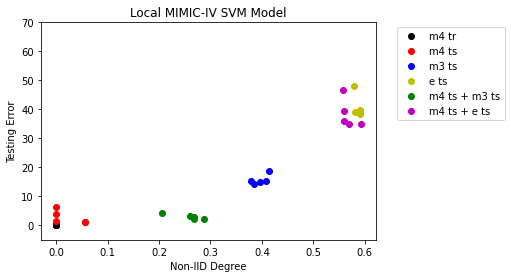

In [37]:
from scipy.stats import pearsonr
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

plt.title('Local {} {} Model'.format(
    'MIMIC-IV', plt_nm))
plt.xlabel('Non-IID Degree')
plt.ylabel('Testing Error')
plt.plot(m4_tr_x, m4_tr_y, 
         'ko', label='{} tr'.format(data_name))
plt.plot(m4_ts_x, m4_ts_y, 
         'ro', label='{} ts'.format(data_name))
plt.plot(m3_ts_x, m3_ts_y, 
         'bo', label='{} ts'.format(d2))
plt.plot(e_ts_x, e_ts_y, 
         'yo', label='{} ts'.format(d3))
plt.plot(m4_m3_ts_x, m4_m3_ts_y, 
         'go', label='{} ts + {} ts'.format(data_name, d2))
plt.plot(m4_e_ts_x, m4_e_ts_y, 
         'mo', label='{} ts + {} ts'.format(data_name, d3))

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

ax = plt.gca()
ax.set_ylim([-5, 70])
# plt.savefig("QM1_{}_pre6hr".format(plt_nm), 
#             bbox_inches='tight')
plt.show()